# OSM-CQRS Metrics

We collected different statistics from our implementation which was running one week on our server. We documented performance of the Changeset-Watcher (CSW) and the three different services.

## CSW results

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

all_dataframe = pd.read_csv("./data/all.statistics.csv")
routing_dataframe = pd.read_csv("./data/routing.statistics.csv")
search_dataframe = pd.read_csv("./data/search.statistics.csv")

statistics = {
    "All": all_dataframe,
    "Routing": routing_dataframe,
    "Search": search_dataframe
}

NUM_OF_INCOMING_ELEMENTS = 'number of incoming elements (reloaded + change-file)'
DURATION_FOR_SPECIFIC_FILTERING = 'duration for specific-preprocessing (in ms)'
NUM_OF_PUBLISHED_ELEMENTS = 'number of published elements'
DURATION_COMPLETE = 'duration for preprocessing (in ms)'
NUM_OF_RELOADED_NODES = 'number of reloaded nodes'

In [2]:
from typing import Any


def analysis_index(statistic: pd.DataFrame, col: str, index_func: str) -> (Any, Any):
    """
    Wrapper function for running methods on dataframes that return an index

    :param statistic: Pandas dataframe
    :param col: Colum to analyse
    :param index_func: Function name that returns an index
    :return: the value calculated and the row of the index
    """
    func = getattr(statistic[col], index_func)
    index = func()
    row = statistic.iloc[index]
    value = row[col]
    return value, row

In [3]:
from typing import Callable


def run_analysis(analysis: Callable, analysis_header: str) -> None:
    """
    Prints the result for all statistics for the given analysis

    :param analysis: Analysis function to run
    :param analysis_header: Analysis header to print
    """
    print(analysis_header + ':')
    for name, statistic in statistics.items():
        value = analysis(statistic)
        if type(value) is tuple:
            print(f"{name}: {str(value[0])}")
            for val in value[1:]:
                print(val)
            print("----------")
        else:
            print(f"{name}:".ljust(20), value)

### Number of events received

In [4]:
def num_of_rows(statistic: pd.DataFrame):
    return len(statistic)

run_analysis(num_of_rows, 'Amount of events received')

Amount of events received:
All:                 9951
Routing:             9951
Search:              9951


### Sum of elements received

In [5]:
sum_incoming = statistics["All"][NUM_OF_INCOMING_ELEMENTS].sum()
sum_incoming

49780431

### Sum of elements published to routing subject

In [6]:
sum_routing_published = statistics["Routing"][NUM_OF_PUBLISHED_ELEMENTS].sum()
sum_routing_published

15987375

### Percentage of all elements published to routing subject

In [7]:
percentage_routing = sum_routing_published / sum_incoming
percentage_routing

0.3211578260541778

### Sum of elements published to search subject

In [8]:
sum_search = statistics["Search"][NUM_OF_PUBLISHED_ELEMENTS].sum()
sum_search

779513

### Percentage of all elements published to search subject

In [9]:
percentage_search = sum_search / sum_incoming
percentage_search

0.01565902472801009

### Maximum number of elements in downloaded changeset

In [10]:
def get_max_num_of_elements(statistic: pd.DataFrame):
    return analysis_index(statistic, NUM_OF_INCOMING_ELEMENTS, 'idxmax')

run_analysis(get_max_num_of_elements, 'Maximum number of elements in downloaded changeset')

Maximum number of elements in downloaded changeset:
All: 209676
ID                                                      2022-04-06T23:35:30Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     31102
number of published elements                                          209676
duration for specific-preprocessing (in ms)                             1736
Name: 1762, dtype: object
----------
Routing: 209676
ID                                                      2022-04-06T23:35:29Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     29408
number of published elements                                            1929
duration for specific-preprocessing 

### Minimum number of elements in downloaded changeset

In [11]:
def get_min_num_of_elements(statistic: pd.DataFrame):
    return analysis_index(statistic, NUM_OF_INCOMING_ELEMENTS, 'idxmin')

run_analysis(get_min_num_of_elements, 'Minimum number of elements in downloaded changeset')

Minimum number of elements in downloaded changeset:
All: 21
ID                                                      2022-04-10T00:44:19Z
number of incoming elements (reloaded + change-file)                      21
number of reloaded nodes                                                  18
duration for preprocessing (in ms)                                      2280
number of published elements                                              21
duration for specific-preprocessing (in ms)                                2
Name: 6092, dtype: object
----------
Routing: 21
ID                                                      2022-04-10T00:44:19Z
number of incoming elements (reloaded + change-file)                      21
number of reloaded nodes                                                  18
duration for preprocessing (in ms)                                      2280
number of published elements                                               5
duration for specific-preprocessing (in ms) 

### Mean number of elements in downloaded changeset

In [12]:
def get_mean_num_of_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_INCOMING_ELEMENTS].mean()

run_analysis(get_mean_num_of_elements, 'Mean number of elements in downloaded changeset')

Mean number of elements in downloaded changeset:
All:                 5002.555622550497
Routing:             5002.555622550497
Search:              5002.555622550497


### Median number of elements in downloaded changeset

In [13]:
def get_median_num_of_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_INCOMING_ELEMENTS].median()

run_analysis(get_median_num_of_elements, 'Median number of elements in downloaded changeset')

Median number of elements in downloaded changeset:
All:                 4224.0
Routing:             4224.0
Search:              4224.0


### Maximum number of published elements

In [14]:
def get_max_num_published_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_PUBLISHED_ELEMENTS].max()

run_analysis(get_max_num_published_elements, 'Maximum number of published elements')

Maximum number of published elements:
All:                 209676
Routing:             25192
Search:              37252


### Minimum number of published elements

In [15]:
def get_min_num_published_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_PUBLISHED_ELEMENTS].min()

run_analysis(get_min_num_published_elements, 'Minimum number of published elements')

Minimum number of published elements:
All:                 21
Routing:             0
Search:              0


### Mean number of published elements

In [16]:
def get_mean_num_published_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_PUBLISHED_ELEMENTS].mean()

run_analysis(get_mean_num_published_elements, 'Mean number of published elements')

Mean number of published elements:
All:                 5002.555622550497
Routing:             1606.6098884534217
Search:              78.33514219676414


### Median number of published elements

In [17]:
def get_median_num_published_elements(statistic: pd.DataFrame):
    return statistic[NUM_OF_PUBLISHED_ELEMENTS].median()

run_analysis(get_median_num_published_elements, 'Median number of published elements')

Median number of published elements:
All:                 4224.0
Routing:             1274.0
Search:              27.0


### Maximum difference between incoming and published elements

In [18]:
def get_max_diff_incoming_published_elements(statistic: pd.DataFrame):
    index = (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).idxmax()
    row = statistic.iloc[index]
    value = row[NUM_OF_INCOMING_ELEMENTS] - row[NUM_OF_PUBLISHED_ELEMENTS]
    return value, row

run_analysis(get_max_diff_incoming_published_elements, 'Maximum diff between incoming and published elements')

Maximum diff between incoming and published elements:
All: 0
ID                                                      2022-04-05T17:50:44Z
number of incoming elements (reloaded + change-file)                    2700
number of reloaded nodes                                                 992
duration for preprocessing (in ms)                                      3250
number of published elements                                            2700
duration for specific-preprocessing (in ms)                               89
Name: 0, dtype: object
----------
Routing: 207747
ID                                                      2022-04-06T23:35:29Z
number of incoming elements (reloaded + change-file)                  209676
number of reloaded nodes                                              153283
duration for preprocessing (in ms)                                     29408
number of published elements                                            1929
duration for specific-preprocessing (in ms

### Minimum difference between incoming and published elements

In [19]:
def get_min_diff_incoming_published_elements(statistic: pd.DataFrame):
    index = (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).idxmin()
    row = statistic.iloc[index]
    value = row[NUM_OF_INCOMING_ELEMENTS] - row[NUM_OF_PUBLISHED_ELEMENTS]
    return value, row

run_analysis(get_min_diff_incoming_published_elements, 'Minimum diff between incoming and published elements')

Minimum diff between incoming and published elements:
All: 0
ID                                                      2022-04-05T17:50:44Z
number of incoming elements (reloaded + change-file)                    2700
number of reloaded nodes                                                 992
duration for preprocessing (in ms)                                      3250
number of published elements                                            2700
duration for specific-preprocessing (in ms)                               89
Name: 0, dtype: object
----------
Routing: 0
ID                                                      2022-04-09T03:48:45Z
number of incoming elements (reloaded + change-file)                      29
number of reloaded nodes                                                  25
duration for preprocessing (in ms)                                      2041
number of published elements                                              29
duration for specific-preprocessing (in ms)    

### Mean difference between incoming and published elements

In [20]:
def get_mean_diff_incoming_published_elements(statistic: pd.DataFrame):
    return (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).mean()

run_analysis(get_mean_diff_incoming_published_elements, 'Mean diff between incoming and published elements')

Mean diff between incoming and published elements:
All:                 0.0
Routing:             3395.9457340970757
Search:              4924.220480353733


### Median difference between incoming and published elements


In [21]:
def get_median_diff_incoming_published_elements(statistic: pd.DataFrame):
    return (statistic[NUM_OF_INCOMING_ELEMENTS] - statistic[NUM_OF_PUBLISHED_ELEMENTS]).median()

run_analysis(get_median_diff_incoming_published_elements, 'Median diff between incoming and published elements')

Median diff between incoming and published elements:
All:                 0.0
Routing:             2633.0
Search:              4163.0


### Maximum duration for complete filtering and reloading

In [22]:
def get_maximum_duration_filtering(statistic: pd.DataFrame):
    return analysis_index(statistic, DURATION_COMPLETE, 'idxmax')

run_analysis(get_maximum_duration_filtering, 'Maximum duration for filtering and reloading elements')

Maximum duration for filtering and reloading elements:
All: 43359
ID                                                      2022-04-06T09:49:45Z
number of incoming elements (reloaded + change-file)                    6099
number of reloaded nodes                                                3046
duration for preprocessing (in ms)                                     43359
number of published elements                                            6099
duration for specific-preprocessing (in ms)                               63
Name: 947, dtype: object
----------
Routing: 43320
ID                                                      2022-04-06T09:49:45Z
number of incoming elements (reloaded + change-file)                    6099
number of reloaded nodes                                                3046
duration for preprocessing (in ms)                                     43320
number of published elements                                            1559
duration for specific-preprocessing 

### Minimum duration for complete filtering and reloading

In [23]:
def get_minimum_duration_filtering(statistic: pd.DataFrame):
    return analysis_index(statistic, DURATION_COMPLETE, 'idxmin')

run_analysis(get_minimum_duration_filtering, 'Minimum duration for filtering and reloading elements')

Minimum duration for filtering and reloading elements:
All: 43
ID                                                      2022-04-06T01:57:14Z
number of incoming elements (reloaded + change-file)                      56
number of reloaded nodes                                                   0
duration for preprocessing (in ms)                                        43
number of published elements                                              56
duration for specific-preprocessing (in ms)                                4
Name: 481, dtype: object
----------
Routing: 41
ID                                                      2022-04-06T01:57:14Z
number of incoming elements (reloaded + change-file)                      56
number of reloaded nodes                                                   0
duration for preprocessing (in ms)                                        41
number of published elements                                              10
duration for specific-preprocessing (in ms

### Mean duration for complete filtering and reloading

In [24]:
def get_mean_duration_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_COMPLETE].mean()

run_analysis(get_mean_duration_filtering, 'Mean duration for filtering and reloading elements')

Mean duration for filtering and reloading elements:
All:                 3903.2198773992563
Routing:             3866.064214651794
Search:              3854.091347603256


### Median duration for complete filtering and reloading

In [25]:
def get_mean_duration_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_COMPLETE].median()

run_analysis(get_mean_duration_filtering, 'Mean duration for filtering and reloading elements')

Mean duration for filtering and reloading elements:
All:                 3207.0
Routing:             3175.0
Search:              3148.0


### Maximum duration for specific filtering

In [26]:
def get_maximum_duration_specific_filtering(statistic: pd.DataFrame):
    return analysis_index(statistic, DURATION_FOR_SPECIFIC_FILTERING, 'idxmax')

run_analysis(get_maximum_duration_specific_filtering, 'Maximum duration for specific filtering')

Maximum duration for specific filtering:
All: 12627
ID                                                      2022-04-12T09:21:05Z
number of incoming elements (reloaded + change-file)                    7736
number of reloaded nodes                                                4300
duration for preprocessing (in ms)                                     15794
number of published elements                                            7736
duration for specific-preprocessing (in ms)                            12627
Name: 9444, dtype: object
----------
Routing: 6626
ID                                                      2022-04-10T08:39:30Z
number of incoming elements (reloaded + change-file)                    4505
number of reloaded nodes                                                3229
duration for preprocessing (in ms)                                      9273
number of published elements                                            1915
duration for specific-preprocessing (in ms)       

### Minimum duration for specific filtering


In [27]:
def get_minimum_duration_specific_filtering(statistic: pd.DataFrame):
    return analysis_index(statistic, DURATION_FOR_SPECIFIC_FILTERING, 'idxmin')

run_analysis(get_minimum_duration_specific_filtering, 'Minimum duration for specific filtering')

Minimum duration for specific filtering:
All: 1
ID                                                      2022-04-09T03:48:45Z
number of incoming elements (reloaded + change-file)                      29
number of reloaded nodes                                                  25
duration for preprocessing (in ms)                                      2036
number of published elements                                              29
duration for specific-preprocessing (in ms)                                1
Name: 4854, dtype: object
----------
Routing: 0
ID                                                      2022-04-09T01:29:37Z
number of incoming elements (reloaded + change-file)                    1019
number of reloaded nodes                                                 448
duration for preprocessing (in ms)                                       784
number of published elements                                              14
duration for specific-preprocessing (in ms)              

### Mean duration for specific filtering

In [28]:
def get_mean_duration_specific_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_FOR_SPECIFIC_FILTERING].mean()

run_analysis(get_mean_duration_specific_filtering, 'Mean duration for specific filtering')

Mean duration for specific filtering:
All:                 68.7165109034268
Routing:             31.81800824037785
Search:              19.892774595518038


### Median duration for specific filtering

In [29]:
def get_median_duration_specific_filtering(statistic: pd.DataFrame):
    return statistic[DURATION_FOR_SPECIFIC_FILTERING].median()

run_analysis(get_median_duration_specific_filtering, 'Median duration for specific filtering')

Median duration for specific filtering:
All:                 57.0
Routing:             25.0
Search:              1.0


### Duration for node reloading in relation to number of reloaded nodes

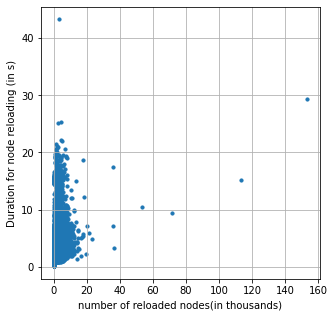

In [30]:
import matplotlib.pyplot as plt

FILTER_ATTRIBUTE = DURATION_COMPLETE
X_AXIS_VALUE = NUM_OF_RELOADED_NODES

reloaded_dataframe = all_dataframe.sort_values(X_AXIS_VALUE)
reloaded_x = reloaded_dataframe[X_AXIS_VALUE] / 1e3
reloaded_y = (reloaded_dataframe[FILTER_ATTRIBUTE] - reloaded_dataframe[DURATION_FOR_SPECIFIC_FILTERING]) / 1e3

plt.figure(figsize=(5, 5))
plt.scatter(reloaded_x, reloaded_y, s=10)
plt.xlabel(X_AXIS_VALUE + "(in thousands)")
plt.ylabel("Duration for node reloading (in s)")
plt.grid()

### Mean duration for node reloading

In [31]:
str(reloaded_y.mean()) + "s"

'3.834503366495829s'

### Duration for specific filtering in relation to number of incoming elements

Size of data points correspond to the number of elements published

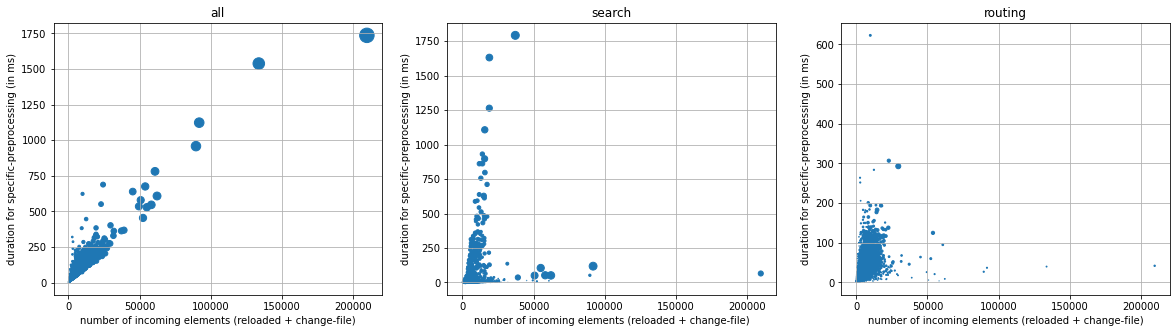

In [32]:
FILTER_ATTRIBUTE = DURATION_FOR_SPECIFIC_FILTERING
X_AXIS_VALUE = NUM_OF_INCOMING_ELEMENTS
search_dataframe = statistics["Search"]
search_filtered_dataframe = search_dataframe[search_dataframe[FILTER_ATTRIBUTE] < 3000].sort_values([X_AXIS_VALUE])
search_x = search_filtered_dataframe[X_AXIS_VALUE]
search_y = search_filtered_dataframe[FILTER_ATTRIBUTE]

routing_dataframe = statistics["Routing"]
routing_filtered_dataframe = routing_dataframe[routing_dataframe[FILTER_ATTRIBUTE] < 6000].sort_values([X_AXIS_VALUE])
routing_x = routing_filtered_dataframe[X_AXIS_VALUE]
routing_y = routing_filtered_dataframe[FILTER_ATTRIBUTE]

all_dataframe = statistics["All"]
all_filtered_dataframe = all_dataframe[all_dataframe[FILTER_ATTRIBUTE] < 6000].sort_values([X_AXIS_VALUE])
all_x = all_filtered_dataframe[X_AXIS_VALUE]
all_y = all_filtered_dataframe[FILTER_ATTRIBUTE]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(all_x, all_y, s=all_filtered_dataframe[NUM_OF_PUBLISHED_ELEMENTS]/1e3)
axs[0].set_title("all")
axs[0].grid()
axs[1].scatter(search_x, search_y, s=search_filtered_dataframe[NUM_OF_PUBLISHED_ELEMENTS]/1e2)
axs[1].set_title("search")
axs[1].grid()
axs[2].grid()
axs[2].scatter(routing_x, routing_y, s=routing_filtered_dataframe[NUM_OF_PUBLISHED_ELEMENTS]/1e3)
axs[2].set_title("routing")

for ax in axs.flat:
    ax.set(xlabel=X_AXIS_VALUE, ylabel=FILTER_ATTRIBUTE)

## Service statistics

In [33]:
import datetime

def date_parse(date):
    return datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ")

## Render service statistic

Size of data points correspond to the event size

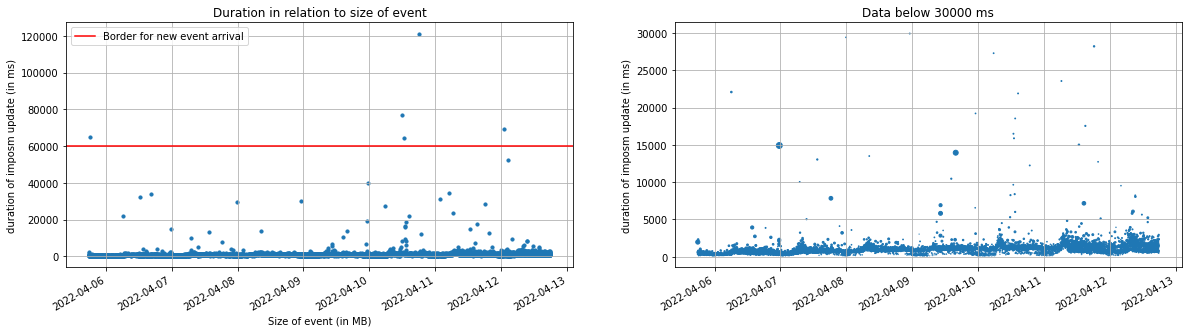

In [34]:
RENDERER_UPDATE_DURATION_COLUMN = 'duration of imposm update (in ms)'
RENDERER_GZIP_COLUMN = 'duration of writing zip file to disk (in ms)'
RENDERER_EVENT_SIZE = 'size of incoming event (in bytes)'
renderer_service_dataframe = pd.read_csv("./data/renderer.statistics.csv", parse_dates=True, date_parser=date_parse, header=1,
                                         index_col=['DateTime'],
                                         names=['DateTime', RENDERER_UPDATE_DURATION_COLUMN, RENDERER_GZIP_COLUMN,
                                                RENDERER_EVENT_SIZE])
renderer_service_dataframe_filtered = renderer_service_dataframe[
    renderer_service_dataframe[RENDERER_UPDATE_DURATION_COLUMN] < 30000]
x = renderer_service_dataframe.index.get_level_values("DateTime")
y = renderer_service_dataframe[RENDERER_UPDATE_DURATION_COLUMN]
x_filtered = renderer_service_dataframe_filtered.index.get_level_values("DateTime")
y_filtered = renderer_service_dataframe_filtered[RENDERER_UPDATE_DURATION_COLUMN]
x_event_size = renderer_service_dataframe[RENDERER_EVENT_SIZE]

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(x, y, s=10)
axs[0].plot()
axs[0].axhline(y=60000, color='r').set_label('Border for new event arrival')
axs[0].set_title("Duration in relation to size of event")
axs[0].legend()
axs[0].grid()
axs[0].set(xlabel='Size of event (in MB)')
axs[1].scatter(x_filtered, y_filtered, s=renderer_service_dataframe_filtered[RENDERER_EVENT_SIZE] / 1e5)
axs[1].set_title("Data below 30000 ms")
axs[1].grid()
for ax in axs.flat:
    ax.set(ylabel=RENDERER_UPDATE_DURATION_COLUMN)

plt.gcf().autofmt_xdate()
plt.show()

## Routing service statistic

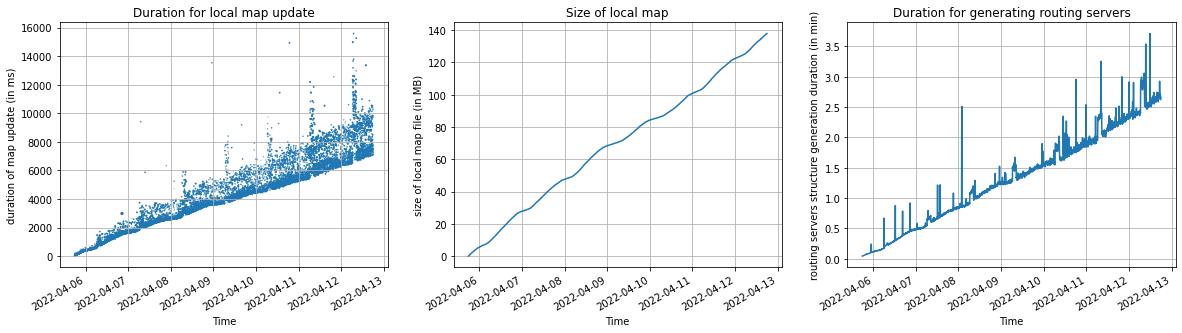

In [35]:
ROUTING_SERVER_DURATION_COLUMN = 'duration of routing servers update (in ms)'
routing_service_dataframe = pd.read_csv("./data/routing-server.statistics.csv", parse_dates=True, date_parser=date_parse,
                                        header=1, index_col=['DateTime'],
                                        names=['DateTime', ROUTING_SERVER_DURATION_COLUMN])

x_routing = routing_service_dataframe.index.get_level_values("DateTime")
y_routing = routing_service_dataframe[ROUTING_SERVER_DURATION_COLUMN]

MAP_UPDATE_DURATION_COLUMN = 'duration of map update (in ms)'
MAP_SIZE_COLUMN = 'size of map (in bytes)'
MAP_GZIP_COLUMN = 'duration of writing zip file to disk (in ms)'
MAP_EVENT_SIZE = 'size of incoming event (in bytes)'
map_service_dataframe = pd.read_csv("./data/map.statistics.csv", parse_dates=True, date_parser=date_parse, header=1,
                                    index_col=['DateTime'],
                                    names=['DateTime', MAP_UPDATE_DURATION_COLUMN, MAP_SIZE_COLUMN, MAP_GZIP_COLUMN,
                                           MAP_EVENT_SIZE])
map_service_dataframe_filtered = map_service_dataframe[map_service_dataframe[MAP_UPDATE_DURATION_COLUMN] < 16000]

x = map_service_dataframe.index.get_level_values("DateTime")
y = map_service_dataframe[MAP_UPDATE_DURATION_COLUMN]
x_event_size = map_service_dataframe[MAP_EVENT_SIZE]
y_filtered = map_service_dataframe_filtered[MAP_UPDATE_DURATION_COLUMN]
x_filtered = map_service_dataframe_filtered.index.get_level_values("DateTime")

y_map_size = map_service_dataframe_filtered[MAP_SIZE_COLUMN]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(x_filtered, y_filtered, s=map_service_dataframe_filtered[MAP_EVENT_SIZE] / 1e5)
axs[0].grid()
axs[0].set_title("Duration for local map update")
axs[0].set(ylabel=MAP_UPDATE_DURATION_COLUMN)
axs[1].plot(x, map_service_dataframe[MAP_SIZE_COLUMN] / 1e6)
axs[1].grid()
axs[1].set_title("Size of local map")
axs[1].set(ylabel='size of local map file (in MB)')
axs[2].plot(x_routing, y_routing / 1e5)
axs[2].grid()
axs[2].set_title("Duration for generating routing servers")
axs[2].set(ylabel='routing servers structure generation duration (in min)')
plt.gcf().autofmt_xdate()
for ax in axs.flat:
    ax.set(xlabel='Time')
plt.show()

### Search service statistic

Mean:  duration of search update (in ms)    210.402473
dtype: float64
Max:  duration of search update (in ms)    131597.916
dtype: float64
Min:  duration of search update (in ms)    0.266
dtype: float64
Median:  duration of search update (in ms)    35.4585
dtype: float64
5


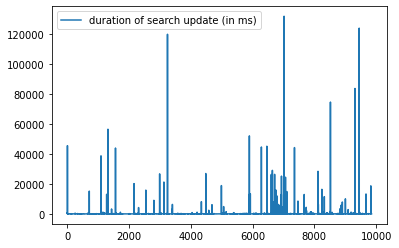

In [36]:
search_service_dataframe = pd.read_csv('./data/search_service.data.csv')
search_service_dataframe[search_service_dataframe['duration of search update (in ms)'] < 1000]
print("Mean: ", search_service_dataframe.mean())
print("Max: ", search_service_dataframe.max())
print("Min: ", search_service_dataframe.min())
print("Median: ", search_service_dataframe.median())
search_service_dataframe.plot()
print(len(search_service_dataframe[search_service_dataframe['duration of search update (in ms)'] > 60000]))